# ARCH model

## **Conditional Means and Conditional Variances**

We have talked about special features for financial asset returns time series. Before we dive into models to formally analyze those features, let's start by learning some concepts that will prepare us for explaining the models later.

We talked about conditional probability in the last module. Now let's learn how to obtain conditional means and conditional variances.

Assume $X$ and $Y$ are two discrete random variables. 

The **conditional mean** of $Y$ given $X$ is as follows:

$$ \mu_{_{Y | X=x}} = \sum_y y f_{Y|X}(y|x) = E(Y|X=x) $$ 

where $f_{Y|X}(y|x)$ is the conditional probability of $Y=y$ given $X=x$.

The **conditional variance** of $Y$ given $X$ is as follows:

$$ \sigma^{2}_{_{Y|X=x}} = \sum_y (y - E[Y|X=x])^2 f_{Y|X}(y|x) = \sum_y (y - \mu_{_{Y | X=x}})^2 f_{Y|X}(y|x)) = E[Y^2|X=x] - \mu_{_{Y | X=x}}^2 $$

We can see that the calculation for conditional means and conditional variances are very similar to calculation for regular means and variances. The difference is we use conditional probability to calculate conditional means and conditional variances. 

Why do we need to know conditional means and conditional variances in the time series context? The central idea is how we can incorporate the concept of using past value information to predict today's value in a model. We actually did that for the ARMA model in the last module. We used the concept of conditional mean to run an ARMA model. Let's use the following example to illustrate the idea.

Consider an AR($p$) model with a constant conditional variance $Var(X_{t} | X_{t-1}, X_{t-2}, \cdots, X_{t-p}) = \sigma^{2}$. We can write the AR($p$) model as follows:

$$ X_{t} = f(X_{t-1}, X_{t-2}, \cdots, X_{t-p}) + e_{t} $$ 

where white noise $e_{t}$ has mean = $0$ and constant conditional variance $\sigma^{2}$, $\ f()$ is the conditional mean for $X_{t}$ given $X_{t-1}, X_{t-2}, \cdots, X_{t-p}$ and $\sigma^{2}$ is the constant conditional variance for $X_{t}$ given $ X_{t-1}, X_{t-2}, \cdots, X_{t-p}$.

Now if we want to introduce non-constant variance like we observed from the Google data in the last section to the above AR($p$) model, we can rewrite the model as:

$$ X_{t} = f(X_{t-1}, X_{t-2}, \cdots, X_{t-p}) + \sigma(X_{t-1}, X_{t-2}, \cdots, X_{t-p})_{t} \ e_{t} $$

Where white noise $e_{t}$ has conditional mean = $0$ and conditional variance = $1$, $\ \sigma(X_{t-1}, X_{t-2}, \cdots, X_{t-p})_{t}$ is the standard deviation for $X_{t}$ given $X_{t-1}, X_{t-2}, \cdots, X_{t-p}$. This standard deviation will change when $X_{t-1}, X_{t-2}, \cdots, X_{t-p}$ change. Since $\sigma(X_{t-1}, X_{t-2}, \cdots, X_{t-p})_{t}$ is standard deviation, it should be non-negative. Later, we will provide regularity conditions to make sure this function is non-negative.

What we just described is a general <u> variance function </u> model for conditional variance. ARCH and GARCH are all types of variance function models.

> In the following sections, we are going to focus our analysis on asset returns. The common observation is that the conditional mean of asset return is $0$, so <u> we will drop the conditional mean part from the above model </u> to focus on the conditional variance part in the following sections. We will start with a simple ARCH(1) model in this lesson. Then, we will introduce a general ARCH($m$) model. In the next lesson, we will expand the ARCH model and introduce the GARCH model.


## **3. ARCH(m) Model**

The Autoregressive Conditional Heteroskedasticity (ARCH) model, introduced by Robert F. Engle in 1982, is a statistical model for time series data that describes the changing variability (volatility) over time. This model is especially useful in financial applications for modeling periods of varying volatility.

Consider an asset return time series {${r_t}$} represented as follows:

$r_t = \mu_t + \epsilon_t,$

where $\mu_t$ is the <u> conditionally constant mean </u>, often modeled by an Autoregressive Moving Average (ARMA) process, such as an ARMA(1, 1):

$\mu_t = \varphi_1 \mu_{t-1} + \varepsilon_t + \theta_{1} \varepsilon_{t-1} $ but we will drop this term and assume mean of asset return is $0$. So our return equation will be:

> $r_t = \epsilon_t = \sigma_t z_t $

and $\epsilon_t$ is the error term. <u> In the ARCH model, the variance of $\epsilon_t$ is not constant but depends on the past $\epsilon_t^2$ values.</u> **NOT $Var(\epsilon_t)$, JUST $\epsilon_t^2$ ITSELF!!**

$\epsilon_t = \sigma_t z_t$

where $z_t$ is a white noise r.v. such that $z_t$ ~ $N(0, 1)$

then variance of $r_t$ is: $Var(r_t) = Var(\epsilon_t) = Var(\sigma_t z_t) = \sigma_t^2 Var(z_t) = \sigma_t^2$

> $Var(r_t) = \sigma_t^2$

Note that sometimes we instead express $z_t$ as a Student's T distributed rv, instead of normally distributed.

And the variance of $\epsilon_t$, which is $\sigma_t^2$ and depends on the past values of $\epsilon_t$, can be expressed as:

$\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2 + \ldots + \alpha_q \epsilon_{t-m}^2,$

where $z_t$ is a white noise process with zero mean and unit variance. The conditional variance $\sigma_t^2$ is expressed in terms of the parameters $\alpha_0, \alpha_1, \ldots, \alpha_q$, which need estimation. The integer $p$ represents the number of lagged error terms, defining the order of the ARCH model, denoted as ARCH(q).

Parameters in an ARCH model are typically estimated using Maximum Likelihood Estimation (MLE). The likelihood function, assuming normality of $z_t$, is given by:

$L(\alpha_0, \alpha_1, \ldots, \alpha_p) = \prod_{t=1}^T \frac{1}{\sqrt{2\pi \sigma_t^2}} \exp\left(-\frac{(y_t - \mu_t)^2}{2\sigma_t^2}\right),$

where $T$ is the number of observations. The estimation process involves maximizing this likelihood function to find the values of $\alpha_0, \alpha_1, \ldots, \alpha_p$.

Post-estimation, the model's adequacy is assessed by examining the residuals $\hat{\epsilon}_t$ for autocorrelation and constant variance. Extensions of the ARCH model, like the Generalized ARCH (GARCH) model, incorporate lagged conditional variances in the variance equation, allowing for more flexibility in volatility modeling.

### **ARCH(1) is Strictly Stationary**

From $r_{t} = \sigma_{t} z_{t}$ and $\sigma^{2}_{t} = \alpha_{0} + \alpha_{1} r^{2}_{t-1}$, we know

$$ r^{2}_{t} = \alpha_{0} z_{t}^{2} + \alpha_{1} z^{2}_{t} r^{2}_{t-1} $$

By iterating the above definition, we can show that 

$$ r_{t} = z_{t} \sqrt{\alpha_{0} \Big(1 + \sum_{j=1}^{\infty } \alpha_{1}^{j} z_{t-1}^{2} \cdots z_{t-j}^{2} \Big)} $$

We will leave the proof as one open-ended question. 


### Proof for the above transformation:

### Original Equations

From your given equations, we have:

The model equation: $\varepsilon_{t} = \sigma_{t} z_{t}$.

The variance equation: $\sigma^{2}_{t} = \alpha_{0} + \alpha_{1} \varepsilon^{2}_{t-1}$.

### Transforming the Model Equation

Given $\varepsilon_{t} = \sigma_{t} z_{t}$, squaring both sides yields:

$$ \varepsilon^{2}_{t} = \sigma^{2}_{t} z^{2}_{t} \,. $$

Substituting the variance equation $\sigma^{2}_{t} = \alpha_{0} + \alpha_{1} \varepsilon^{2}_{t-1}$ into the above, we get:

$$ \varepsilon^{2}_{t} = (\alpha_{0} + \alpha_{1} \varepsilon^{2}_{t-1}) z^{2}_{t} \,. $$

This can be rewritten as:

$$ \varepsilon^{2}_{t} = \alpha_{0} z_{t}^{2} + \alpha_{1} z^{2}_{t} \varepsilon^{2}_{t-1} \,. $$

### Iterating the Equation

For $\varepsilon_{t-1}^2$, we have:

$$ \varepsilon_{t-1}^2 = \alpha_{0} z_{t-1}^{2} + \alpha_{1} z_{t-1}^{2} \varepsilon_{t-2}^2 \,. $$

Substituting this into the equation for $\varepsilon_{t}^2$, we get:

$$ \varepsilon_{t}^2 = \alpha_{0} z_{t}^{2} + \alpha_{1} z_{t}^{2} [\alpha_{0} z_{t-1}^{2} + \alpha_{1} z_{t-1}^{2} \varepsilon_{t-2}^2] \,. $$

Iterating further, we expand $\varepsilon_{t-2}^2$, $\varepsilon_{t-3}^2$, and so on. This process leads to an infinite series:

$$ \varepsilon_{t}^2 = \alpha_{0} z_{t}^{2} \left[ 1 + \alpha_{1} z_{t-1}^{2} + \alpha_{1}^2 z_{t-1}^{2} z_{t-2}^{2} + \alpha_{1}^3 z_{t-1}^{2} z_{t-2}^{2} z_{t-3}^{2} + \ldots \right] \,. $$

### Final Expression

Taking square roots on both sides, we arrive at the expression for $\varepsilon_{t}$:

$$ \varepsilon_{t} = z_{t} \sqrt{\alpha_{0} \left(1 + \sum_{j=1}^{\infty} \alpha_{1}^{j} z_{t-1}^{2} \cdots z_{t-j}^{2} \right)} \,. $$

### Key Points in the Proof

* Assumption of Stationarity: For the infinite series to converge, $\alpha_{1}$ must be less than 1. This is a necessary condition for the stationarity of the ARCH process.

* White Noise: $z_t$ is assumed to be white noise, meaning it's independently and identically distributed with a mean of zero and variance of one.

* Infinite Series: The infinite series in the final expression represents the cumulative impact of past squared white noise terms on the current variance, exponentially weighted by $\alpha_{1}$.

* This proof illustrates the ARCH model's dynamic incorporation of past volatilities into the current time period's volatility, a key characteristic of financial time series exhibiting volatility clustering.

### **$r_{t}$ is Conditionally Normally Distributed**

The conditional mean of $r_{t}$ is given by:

$$ E(r_{t}|r_{s}, s< t) = E(\sigma_{t}z_{t}|r_{s}, s< t) = \sigma_{t} E(z_{t}) = \sigma_{t} \cdot 0 = 0 $$

Conditional variance of $r_{t}$ is as follows:

$$ \sigma^{2}_{t} = \alpha_{0} + \alpha_{1} \epsilon^{2}_{t-1} = \alpha_{0} + \alpha_{1} r^{2}_{t-1} $$

Hence $r_{t}|r_{t-1} \sim N(0, \alpha_{0} + \alpha_{1} r_{t-1}^{2})$.

We can see from the above conditional variance equation, the current variance of $r_{t}$ depends on the past value of $r_{t-1}$. It means <u> when $r_{t-1}$ has a large value at time $t-1$, the variance at time $t$ will be large too. </u> It then implies that $r_{t}$ will have large volatility at time $t$. This model set up is able to capture the **volatility clustering** phenomenon we observed in the Google stock return data.

### **Unconditional $r_{t}$ is White Noise**

### Unconditional Mean of $r_t$

The unconditional mean of $r_t$ is given by:

$E[r_t] = E[ E[r_t | r_s: s < t]] = 0$

This formula signifies that the expected value of $r_t$, considering all possible values of $r_s$ where $s < t$, is zero. It suggests that without any conditioning, the expectation of $r_t$ is <u> independent</u> of its past values, making it a white noise process.

### Unconditional Variance of $r_t$

To derive the unconditional variance of $r_t$, we consider the expectation of the square of $r_t$:

$$ \begin{align*} Var(r_t) = E(r_t^{2}) &= E(z_t^{2} (\alpha_0 (1 + \sum_{j=1}^{\infty} \alpha_1^{j} z_{t-1}^{2} \cdots z_{t-j}^{2}))) \\ &= \alpha_0 (1 + \alpha_1 + \alpha_1^{2} + \cdots + \alpha_1^{\infty}) \\ &= \frac{\alpha_0}{1-\alpha_1} ,\quad \text{where } 0 \le \alpha_1 < 1 \end{align*} $$

This equation reflects the ARCH model's feature that the variance of $r_t$ depends on the sum of squared past error terms $e_t$. The final simplification to $\frac{\alpha_0}{1-\alpha_1}$ is based on the sum of a geometric series, valid when $0 \le \alpha_1 < 1$.

### Autocovariance of $r_t$

The autocovariance of $r_t$ is expressed as:

$$ cov(r_{t+h}, r_t) = E[r_{t+h}  r_t] - E[r_{t+h}]  E[r_t] $$

$$ = E(r_{t+h} r_t) - 0 $$

$$ = E[ E(r_{t+h} r_t | r_s: s < t+h) ] $$

$$ = E[ r_t E(r_{t+h} | r_s: s < t+h)] $$

And because $E[r_{t+h} | r_s: s < t+h] = 0$ from unconditional mean formula:

$$ = E[ r_t \cdot 0] = 0 , \quad \text{for all } h > 0 $$

In this formula, we see that the covariance of $r_t$ with its future values ($r_{t+h}$) is zero for all $h > 0$. This implies that future values do not correlate with present values, a hallmark of a white noise process.

### Unconditional Distribution of $r_t$

Thus, the unconditional distribution of $r_t$ is given by a white noise process:

$$ r_t \sim N \left(0, \frac{\alpha_0}{1-\alpha_1} \right) $$

This result shows that $r_t$ is **unconditionally homoscedastic** (having constant variance) when $0 \le \alpha_1 < 1$. It implies that while $r_t$ is **conditionally heteroskedastic** (varying variance conditioned on past values), it exhibits constant variance when viewed unconditionally.

### Conclusion

Although the ARCH model is often applied to asset returns, it was originally designed for modeling squared error terms in time series. This foundational concept is why the ARCH model demonstrates the properties of white noise under certain conditions.

### **$r_{t}$ Is Not i.i.d.**

Although $r_{t}$ has $0$ covariance to its past values, $r^{2}_{t}$ **does depend** on the squared past returns. It can be shown as follows:

$$ \begin{align*}
  E(r^{2}_{t}|r_{t-1}) &= E(\alpha_{0} z_{t}^{2} + \alpha_{1} z_{t}^{2} r_{t-1}^{2} | r_{t-1})  \\
        &= \alpha_{0} + \alpha_{1} r_{t-1}^{2} 
\end{align*} $$

So we can see ARCH(1) is a case where the elements in the process have $0$ covariance, but the elements are not independent. This conclusion also confirms our previous knowledge that two variables with $0$ covariance do not mean they are independent.


### **$r_{t}^{2}$ IS An AR(1) Process**

### Squaring $r_t$ in the ARCH(1) Model
From the ARCH(1) definition, squaring $r_t$ gives:

$$ r_t^2 = \sigma_t^2 z_t^2 $$

This equation simply squares the ARCH model equation, where $r_t$ is the return at time $t$, $\sigma_t^2$ is the conditional variance, and $z_t$ is the white noise error term with unit variance such that $z_t \sim N(0, 1)$

Next, the ARCH(1) variance equation is:

$$ \alpha_0 + \alpha_1 r_{t-1}^2 = \sigma_t^2 $$

This equation defines the **conditional variance** $\sigma_t^2$ as a function of a constant $\alpha_0$ and the lagged squared return $\alpha_1 r_{t-1}^2$.

### Deriving a New Equation

Subtracting the second equation from the first:

$$ r_t^2 - (\alpha_0 + \alpha_1 r_{t-1}^2) = \sigma_t^2 (z_t^2 - 1) $$

This step isolates the term $\sigma_t^2 (z_t^2 - 1)$ on one side, indicating the deviation of the squared error term $z_t^2$ from its mean (which is 1 for white noise).

Rewriting this, we get:

$$ r_t^2 = \alpha_0 + \alpha_1 r_{t-1}^2 + \nu_t $$

where $\nu_t = \sigma_t^2 (z_t^2 - 1)$ is white noise and $\alpha_1 < 1$. This new form resembles an AR(1) process but with an added white noise term $\nu_t$.

### Conditions for ACF of $r_t^2$

If $E(r_t^4) < \infty$, then $r_t^2$ has the same autocorrelation function (ACF) as an AR(1) process. This condition ensures that the fourth moment of $r_t$ is finite, which is a prerequisite for the ACF to be meaningful.

The ACF for $r_t^2$ is:

$$ \rho_{r^2}(h) = \alpha_1^{|h|} $$

for all $h$ and $\alpha_1 < 1$. This formula states that the ACF of the squared returns decays exponentially with the lag $h$, typical of an AR(1) process.

### Implications for Modeling

Knowing that the squared asset return is a stationary AR(1) process, we can use ACF and Partial Autocorrelation Function (PACF) plots of asset return and squared asset return to identify an ARCH(1) model. If the asset return time series plot exhibits a white noise pattern (no autocorrelation) and the squared asset return PACF plot shows a cut-off pattern after lag 1, an ARCH(1) model is appropriate for modeling the variance of the asset return. This approach will be elaborated upon in later sections.

### **$r_{t}$ Has Heavier Tails Than Standard Normal Distribution If $\alpha_{1}<\frac{1}{3}$**

When $3\alpha_{1}<1$ and $E(r_{t}^{4})<\infty $, we can show that kurtosis of $r_{t}$ is greater than 3. It means that $r_{t}$ has heavier tails than standard normal distribution. It is similar to our empirical observations that asset return usually has more outliers than a time series generated from normal distribution.

### **ARCH($m$) Process**

We have introduced ARCH(1) process in previous sections. We can extend the process to include return values from several pass time periods to form an ARCH($m$) process. An ARCH($m$) process is the process to predict current variance with squared asset return values going back to $m$ time periods. Here is the formal definition for ARCH($m$) process:

$$ r_{t} = \sigma_{t} z_{t} $$

Where $z_{t} \sim iid N(0,1)$ and

$$ \sigma^{2}_{t} = \alpha_{0} + \alpha_{1} r^{2}_{t-1} + \alpha_{2} r_{t-2}^{2} + \cdots + \alpha_{m} r_{t-m}^{2} $$

With some restrictions on ARCH($m$) coefficients, the squared asset returns will be AR($m$).

## **ARCH(1) Simulation**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch.univariate import ARCH, ConstantMean, Normal
from scipy import stats

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [3]:
# Load the dataset
m5_data = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M5/M5. goog_eur_10.csv")

# Convert date variable to date format and set index
m5_data["Date2"] = pd.to_datetime(m5_data["Date"], format="%m/%d/%Y")
goog = m5_data.loc[:, ["Date2", "GOOGLE"]].set_index("Date2")
goog.head()

,GOOGLE
Date2,
2016-01-04,741.840027
2016-01-05,742.580017
2016-01-06,743.619995
2016-01-07,726.390015
2016-01-08,714.469971


In this section, let's take a look at simulation data to get a visual understanding of an ARCH(1) process:

$\sigma_t^2 = 5 + 0.5 \varepsilon_{t-1}$

**Figure 3: ARCH(1) Simulation n=1000, $\alpha_{0}=5$ and $\alpha_{1}=0.5$**


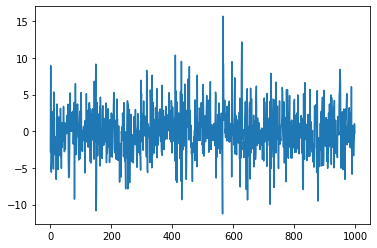

In [4]:
# ARCH(1) Simulation n=1000, alpha_0=5 and alpha_1=0.5

# simulated process parameters
rs = np.random.RandomState([12345, 77777])
dist = Normal(seed=rs)
vol = ARCH(p=1)
repro_mod = ConstantMean(None, volatility=vol, distribution=dist)
params = pd.Series({"mu": 0.0, "omega": 5, "alpha[1]": 0.5, "beta[1]": 0.0})

# model simulation
arch1_sim = repro_mod.simulate(params, nobs=1000)
plt.plot(arch1_sim.data)
plt.show()

Figure 3 shows a simulated ARCH(1) process. From the graph, we can see the time series oscillates around $0$ with occasional bursts of volatility. We can also see there are clusters of high volatility during the whole time period, like around $t = 600$. These features are all in agreement with the common features of financial asset returns we discussed earlier.


**Figure 4: ACF and PACF of ARCH(1) Simulated Time Series**


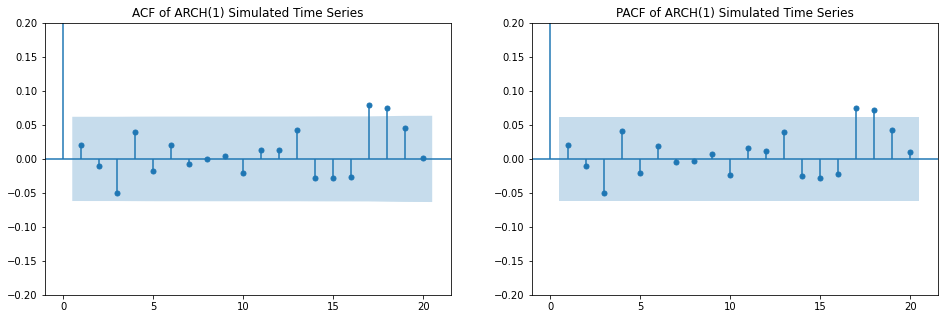

In [5]:
# ACF and PACF of ARCH(1) Simulated Time Series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(arch1_sim.data.dropna(), lags=20, ax=ax1)
ax1.set(title="ACF of ARCH(1) Simulated Time Series")
ax1.set_ylim([-0.2, 0.2])

sm.graphics.tsa.plot_pacf(arch1_sim.data.dropna(), lags=20, ax=ax2)
ax2.set(title="PACF of ARCH(1) Simulated Time Series")
ax2.set_ylim([-0.2, 0.2])
plt.show()

The ACF and PACF plots in figure 4 shows that the simulated time series do not exhibit any correlations and behave quite like white noise.

**Figure 5: ACF and PACF of Squared ARCH(1) Simulated Time Series**

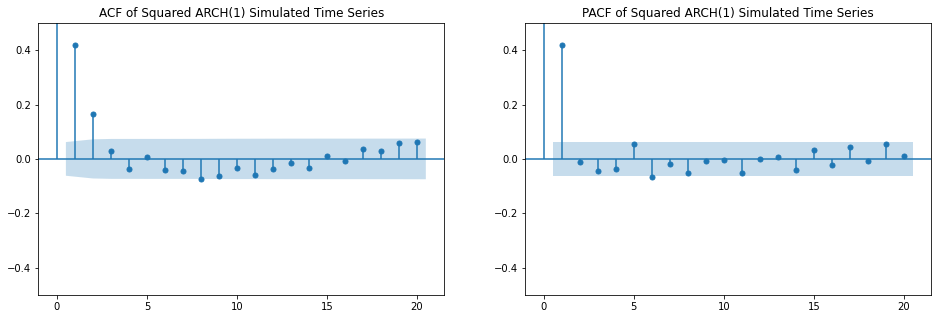

In [6]:
# ACF and PACF of Squared ARCH(1) Simulated Time Series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(arch1_sim.data.dropna() ** 2, lags=20, ax=ax1)
ax1.set(title="ACF of Squared ARCH(1) Simulated Time Series")
ax1.set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_pacf(arch1_sim.data.dropna() ** 2, lags=20, ax=ax2)
ax2.set(title="PACF of Squared ARCH(1) Simulated Time Series")
ax2.set_ylim([-0.5, 0.5])
plt.show()

However, in figure 5, the PACF plot of squared simulated time series shows a drop after lag 1. The ACF shows a gradual decline. The two graphs suggest the properties of the AR(1) process for the squared simulated time series.